In [1224]:
# -*- coding: utf-8 -*-
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing
import os
import scipy as sp

In [1225]:
PATH = 'dataset/metabolite/'
direc = '/home/bae/SC/jupyter/meta-image/'
name = 'glycine-standard'
SAVE = direc+name
data = pd.read_excel(PATH+name+'.xlsx')
data.head()

,m/z,Absolute Intensity,Relative Intensity
0,45,52277,6.99
1,46,1109,0.15
2,47,41757,5.58
3,48,590,0.08
4,49,1294,0.17


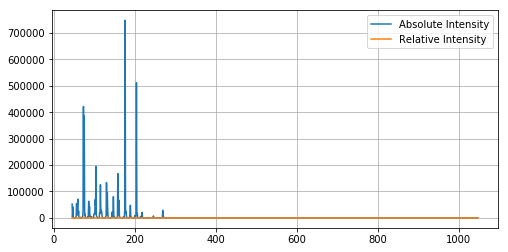

In [1226]:
x = data["m/z"]
y = data["Absolute Intensity"]
z = data["Relative Intensity"]

plt.figure(figsize=(8,4))
plt.plot(x, y, label='Absolute Intensity')
plt.plot(x, z, label='Relative Intensity')
plt.grid()
plt.legend()
plt.show()

In [1227]:
x = data["m/z"]
y = data["Absolute Intensity"]
z = data["Relative Intensity"]

x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(z)

nx = x/max(x) # max nomal
ny = y/max(y)
nz = z/max(z)

lx = np.log(x) # log nomal
ly = np.log(y)
lz = np.log(z)

nlx = lx/max(lx) # max log nomal
nly = ly/max(ly)
nlz = lz/max(lz)

ex = np.exp(x) # exp nomal
ey = np.exp(y)
ez = np.exp(z)

etx = nx*(np.log2(1/nx)) # entropy nomal
ety = ny*(np.log2(1/ny))
etz = nz*(np.log2(1/nz))

print(etx)

print('x:{}, max_x:{}, nx:{}'.format(x[0], max(x), nx[0]))
print('y:{}, max_y:{}, ny:{}'.format(y[0], max(y),ny[0]))
print('z:{}, max_z:{}, nz:{}'.format(z[0], max(z),nz[0]))

[0.19501016 0.19795192 0.20086375 0.20374628 0.20660014 0.2094259
 0.21222412 0.21499535 0.21774011 0.22315218 0.22582043 0.2284641
 0.23108362 0.23367941 0.23625186 0.23880136 0.2413283  0.24383303
 0.24631591 0.24877728 0.25121747 0.2536368  0.25603558 0.25841412
 0.26077271 0.26311163 0.26543116 0.26773157 0.27001312 0.27227607
 0.27452067 0.27674714 0.27895575 0.2811467  0.28547654 0.28761586
 0.28973839 0.29184434 0.2939339  0.29600726 0.29806462 0.30010615
 0.30213203 0.30414245 0.30613758 0.30811757 0.3100826  0.31203283
 0.31588951 0.31779626 0.31968883 0.32156734 0.32343195 0.32528279
 0.32712    0.32894372 0.33075407 0.33255118 0.33433518 0.3361062
 0.33960975 0.34134252 0.34306278 0.34477063 0.3464662  0.34814958
 0.34982089 0.35148022 0.35312769 0.35476339 0.35638743 0.35799989
 0.35960089 0.36119051 0.36276884 0.36433598 0.36589202 0.36743705
 0.36897115 0.37049441 0.37200692 0.37350875 0.375      0.37648074
 0.37795105 0.379411   0.38086069 0.38230017 0.38514885 0.3865581

/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


In [1228]:
dim = len(data)

arraynlx = nlx.reshape((1,dim)) #log배열
arraynly = nly.reshape((1,dim))
arraynlz = nlz.reshape((1,dim))

arrayx = etx.reshape((1,dim)) #entropy 배열
arrayy = ety.reshape((1,dim))
arrayz = etz.reshape((1,dim))

xmean = np.mean(arrayx) #entropy x배열의 평균
xvar = np.var(arrayx) #entropy x배열의 분산
xstd = np.std(arrayx) #entropy x배열의 표준편차

ymean = np.mean(arrayy) #entropy y배열의 평균
yvar = np.var(arrayy) #entropy y배열의 분산
ystd = np.std(arrayy) #entropy y배열의 표준편차

zmean = np.mean(arrayz) #entropy z배열의 평균
zvar = np.var(arrayz) #entropy z배열의 분산
zstd = np.std(arrayz) #entropy z배열의 표준편차

xymean = np.mean(arrayx+arrayy) ##entropy x+y배열의 평균

firstcov = data.cov() #데이터의 공분산
seccov = np.cov(arrayx, arrayy) #x,y배열의 공분산
aseccov = np.asarray(seccov) #x,y배열의 공분산을 하나의 배열로 변환
etcov = seccov*(np.log2(1/seccov)) #entropy적용한 공분산

## cov1 = np.cov(x, y)[0][1]  테스트중
## cov1abs = abs(cov1)   테스트중

print(xmean, ymean, zmean)
print(xvar, yvar, zvar)
print(xstd, ystd, zstd)
print(xymean)
#print(cov1)
#print(cov1abs)
print(seccov)
print(etcov)

0.37523328684200263 0.020140104181275625 nan
0.020797377764324023 0.004403763645764619 nan
0.14421295976549411 0.06636085929043278 nan
0.39537339102327823
[[ 0.02082769 -0.00051941]
 [-0.00051941  0.00441018]]
[[0.11633003        nan]
 [       nan 0.03450944]]


/home/bae/anaconda3/envs/356/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log2


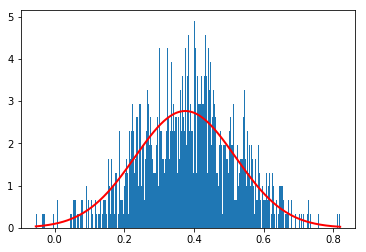

In [1229]:
import numpy as np
import matplotlib.pyplot as plt

mu1, sigma1 = xmean, xstd # mean and standard deviation
# np.random.nomral 함수를 이용해서 평균 0, 표준편차 0.1인 sample들을 1000개 추출한다.
s1 = np.random.normal(mu1, sigma1, 1050)

# sample들의 historgram을 출력한다.
count, bins, ignored = plt.hist(s1, 300, normed=True)
# sample들을 이용해서 Gaussian Distribution의 shape을 재구축해서 line으로 그린다.
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) * 
		np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ), linewidth=2, color='r')
plt.savefig(SAVE+"xz.png")

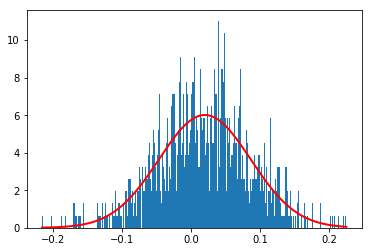

In [1230]:
mu2, sigma2 = ymean, ystd # mean and standard deviation
# np.random.nomral 함수를 이용해서 평균 0, 표준편차 0.1인 sample들을 1000개 추출한다.
s2 = np.random.normal(mu2, sigma2, 1050)

# sample들의 historgram을 출력한다.
count, bins, ignored = plt.hist(s2, 300, normed=True)
# sample들을 이용해서 Gaussian Distribution의 shape을 재구축해서 line으로 그린다.
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) * 
		np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ), linewidth=2, color='r')
plt.savefig(SAVE+"yz.png")

[[ 0.02082769 -0.00051941]
 [-0.00051941  0.00441018]]


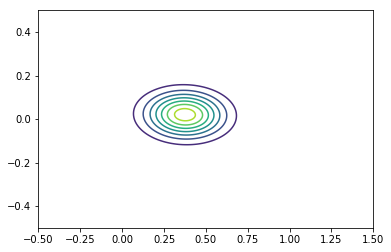

In [1231]:
from scipy.stats import multivariate_normal
XX, YY = np.mgrid[-0.5:1.5:500j, -0.5:0.5:200j] #[-0.5~1.5사이에 500개의 원소를 나타냄]
rv = multivariate_normal([xmean, ymean], [[0.0233111, -0.00034617],
                                          [-0.00034617, 0.00469688]]) #앞서구한 공분산으로 다변수정규분포를 구함
plt.grid(False)
plt.contour(XX, YY, rv.pdf(np.dstack((XX, YY)))) #등고선 그리기
print(seccov)

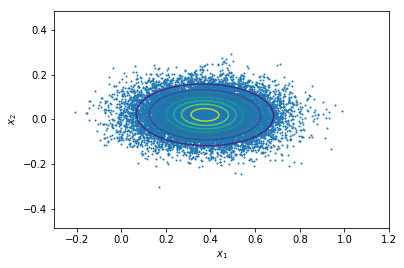

In [1232]:
X = rv.rvs(20000) #20000개의 원소를 생성

xx = np.linspace(-0.3, 1.2, 5000) #(-0.3~1.2사이에 5000개의 원소)
yy = np.linspace(-0.4, 0.4, 5000) #(-0.4~0.4사이에 5000개의 원소)
XX, YY = np.meshgrid(xx, yy) #2차원좌표로변환

plt.scatter(X[:, 0], X[:, 1], s=1) #원소그리기
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY]))) #등고선그리기
plt.axis("equal")
plt.xlim(-0.3, 1.2) #x축의 제한
plt.ylim(-0.4, 0.4) #y축의 제한
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig(SAVE+"mn2d.png")

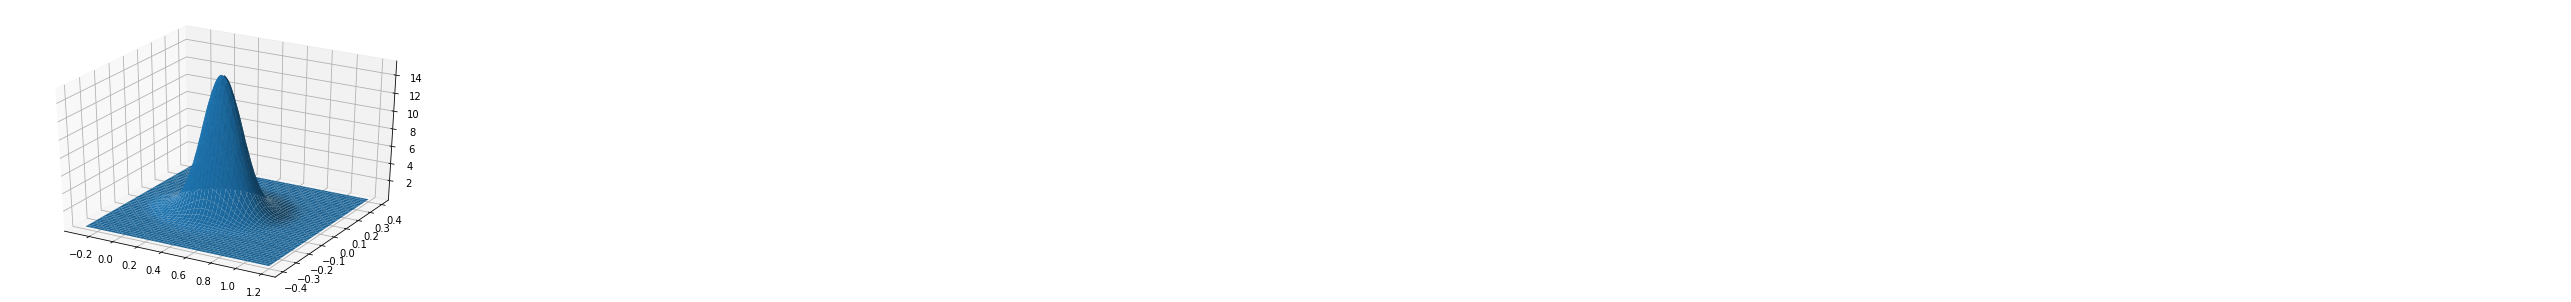

In [1233]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, rv.pdf(np.dstack((XX, YY)))) #다변수정규분포를 3D로 표현
plt.savefig(SAVE+"mn3d.png")

In [1234]:
np.savez('Alanine-sample-limit-log.npz', arrayx=arrayx, arrayy=arrayy, arrayz=arrayz)
data = np.load('Alanine-sample-limit-log.npz')
ex = data['arrayx']
ey = data['arrayy']
ez = data['arrayz']
print(data)
print(ex)
print(ey)
print(ez)

[[0.19501016 0.19795192 0.20086375 0.20374628 0.20660014 0.2094259
  0.21222412 0.21499535 0.21774011 0.22315218 0.22582043 0.2284641
  0.23108362 0.23367941 0.23625186 0.23880136 0.2413283  0.24383303
  0.24631591 0.24877728 0.25121747 0.2536368  0.25603558 0.25841412
  0.26077271 0.26311163 0.26543116 0.26773157 0.27001312 0.27227607
  0.27452067 0.27674714 0.27895575 0.2811467  0.28547654 0.28761586
  0.28973839 0.29184434 0.2939339  0.29600726 0.29806462 0.30010615
  0.30213203 0.30414245 0.30613758 0.30811757 0.3100826  0.31203283
  0.31588951 0.31779626 0.31968883 0.32156734 0.32343195 0.32528279
  0.32712    0.32894372 0.33075407 0.33255118 0.33433518 0.3361062
  0.33960975 0.34134252 0.34306278 0.34477063 0.3464662  0.34814958
  0.34982089 0.35148022 0.35312769 0.35476339 0.35638743 0.35799989
  0.35960089 0.36119051 0.36276884 0.36433598 0.36589202 0.36743705
  0.36897115 0.37049441 0.37200692 0.37350875 0.375      0.37648074
  0.37795105 0.379411   0.38086069 0.38230017 0.385

In [1235]:
colors = cm.hsv(nz)
colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(z)

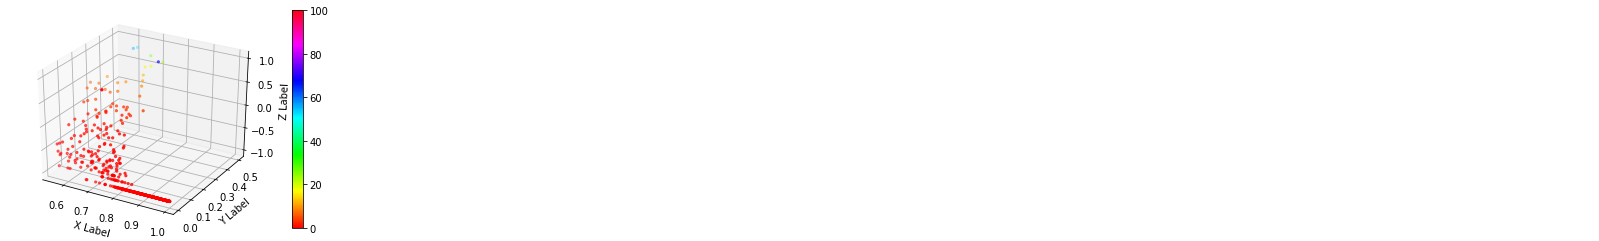

In [1236]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nlx, ety, nlz, c=colors, marker='.')
cb = fig.colorbar(colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

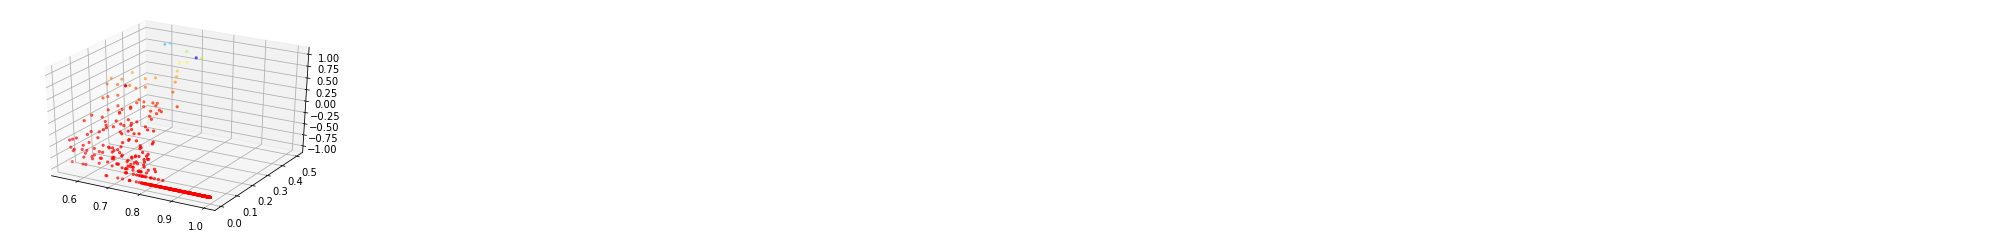

In [1237]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nlx, ety, nlz, c=colors, marker='.')

plt.grid()
plt.savefig(SAVE+"et3d.png")

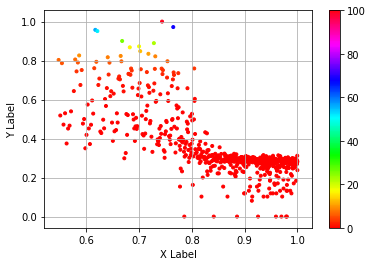

In [1238]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nlx, nly, c=colors, marker='.')
cb = fig.colorbar(colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.grid()
plt.show()

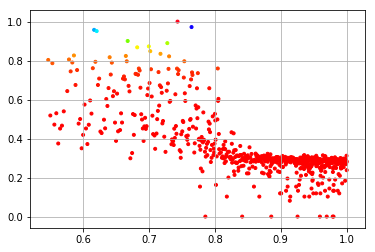

In [1239]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nlx, nly, c=colors, marker='.')


plt.grid()
plt.show()
fig.savefig(SAVE+"et2d.png")

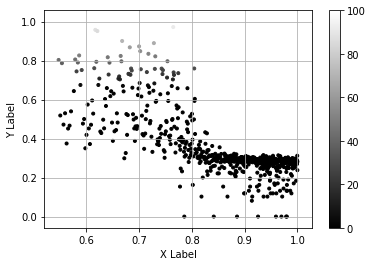

In [1240]:
g_colors = cm.gray(nlz)
g_colmap = cm.ScalarMappable(cmap=cm.gray)
g_colmap.set_array(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nlx, nly, c=g_colors, marker='.')
cb = fig.colorbar(g_colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.grid()
plt.show()